# Week2授業前課題1 小麦とチェス盤問題

## 目的
・数式演算ライブラリのNumPyに慣れる  
・グラフの表示に慣れグラフの表示に慣れる  

## 小麦とチェス盤問題
曽呂利新左衛門の米の逸話に似たものとして、小麦とチェス盤の話がある。これを題材に多次元配列を扱うための数値計算ライブラリ NumPy の使い方に慣れていく。  
>If a chessboard were to have wheat placed upon each square such that one grain were placed on the first square, two on the second, four on the third, and so on (doubling the number of grains on each subsequent square), how many grains of wheat would be on the chessboard at the finish?
  
8×8マスのチェス盤の上に、小麦の粒を1, 2, 4と順番に置いていくと最終的な小麦の数はどのようになるかという問題である。

### 少ないマスで考える
まずは4マスの板に小麦の粒を並べていくことを考える。配列（リスト）の1つの要素を1つのマスに見立てていく。  

In [1]:
# サンプルコード
n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

import numpy as np

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


### 【問題1】2×2マスのチェス盤の小麦の数
2×2マスのチェス盤をndarrayによって表現し、各マスの小麦の数を計算する。左上のマスに小麦を1つ置いた後、その右が2つ、左下が4つ、右下が8つという風に進む。
サンプルコードで作成したndarrayのshapeの変形を行っていく。

In [2]:
# coding utf8
# 
# 【問題1】2×2マスのチェス盤の小麦の数

import numpy as np

n_squares = 4
small_board_list = [1]
for _ in range(n_squares - 1):
    small_board_list.append(2*small_board_list[-1])
print("4マスの板に小麦を並べる（リスト）：{}".format(small_board_list))

small_board_ndarray = np.array(small_board_list)
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

small_board_ndarray_2_2 = small_board_ndarray.reshape(2, 2)
print("2×2マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray_2_2))

4マスの板に小麦を並べる（リスト）：[1, 2, 4, 8]
4マスの板に小麦を並べる（ndarray）：[1 2 4 8]
2×2マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]


### 8×8マスのチェス盤

### 【問題2】n×mマスへの拡張
n×mマスのチェス盤の小麦の数を記したndarrayを返す関数を作成する。そして、この関数を使い8×8マスのチェス盤の小麦の数を求める。

In [3]:
# 【問題2】n×mマスへの拡張

def board_n_m(n, m):
    """
    n×mマスのチェス盤の小麦の数を記したndarrayを返す関数。
    
    Parameteres
    --------------
    n: int
        チェス盤の行数
        
     m: int
         チェス盤の列数

    Returns
    --------------
    board_ndarray: ndarray
        n×mマスのチェス盤の小麦の数を記したndarray
    """
    n_squares = n*m
    small_board_list = [1]
    for _ in range(n_squares - 1):
        small_board_list.append(2*small_board_list[-1])
    small_board_ndarray = np.array(small_board_list).astype(np.uint64)
    board_ndarray_n_m = small_board_ndarray.reshape(n, m)
    return board_ndarray_n_m

In [4]:
# 検証
print("2×2マスの板に小麦を並べる（ndarray）：{}".format(board_n_m(2, 2)))
print("3×5マスの板に小麦を並べる（ndarray）：{}".format(board_n_m(3, 5)))

2×2マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]
3×5マスの板に小麦を並べる（ndarray）：[[    1     2     4     8    16]
 [   32    64   128   256   512]
 [ 1024  2048  4096  8192 16384]]


In [5]:
# 解答
print("8×8マスの板に小麦を並べる（ndarray）：{}".format(board_n_m(8, 8)))

8×8マスの板に小麦を並べる（ndarray）：[[                  1                   2                   4
                    8                  16                  32
                   64                 128]
 [                256                 512                1024
                 2048                4096                8192
                16384               32768]
 [              65536              131072              262144
               524288             1048576             2097152
              4194304             8388608]
 [           16777216            33554432            67108864
            134217728           268435456           536870912
           1073741824          2147483648]
 [         4294967296          8589934592         17179869184
          34359738368         68719476736        137438953472
         274877906944        549755813888]
 [      1099511627776       2199023255552       4398046511104
        8796093022208      17592186044416      35184372088832
       7036874417

### 【問題3】小麦の数の合計
8×8マスのチェス盤の小麦の数の合計を求める。また、各列の平均を求め、それを棒グラフで可視化する。

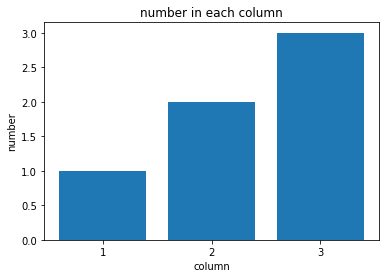

In [6]:
# 棒グラフのサンプルコード
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel("column")
plt.ylabel("number")
plt.title("number in each column")
plt.xticks(np.arange(0, 4, 1))  #フィードバック　横軸目盛りの修正
plt.bar(np.arange(1,4), np.array([1, 2, 3]))
plt.show()

8×8マスのチェス盤の小麦の数の合計:18446744073709551615


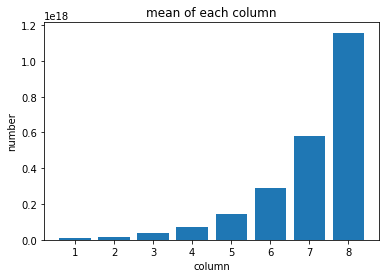

In [7]:
#  【問題3】小麦の数の合計
import matplotlib.pyplot as plt
%matplotlib inline

board_ndarray_8_8 = board_n_m(8, 8)
print("8×8マスのチェス盤の小麦の数の合計:{}".format(board_ndarray_8_8.sum()))

plt.xlabel("column")
plt.ylabel("number")
plt.title("mean of each column")
plt.bar(np.arange(1,9), board_ndarray_8_8.mean(axis=0))
plt.show()

#### 検証

2×3マスの板に小麦を並べる（ndarray）：[[ 1  2  4]
 [ 8 16 32]]
2×3マスのチェス盤の小麦の数の合計:18446744073709551615
2×3マスの板に小麦を並べる（ndarray）：[ 4.5  9.  18. ]


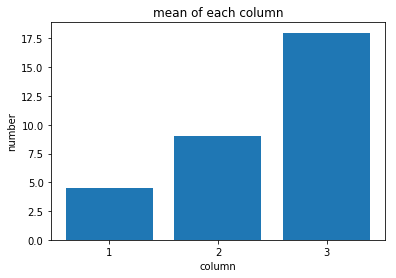

In [8]:
# 検証
board_ndarray_2_3 = board_n_m(2, 3)
print("2×3マスの板に小麦を並べる（ndarray）：{}".format(board_ndarray_2_3))
print("2×3マスのチェス盤の小麦の数の合計:{}".format(board_ndarray_8_8.sum()))
print("2×3マスの板に小麦を並べる（ndarray）：{}".format(board_ndarray_2_3.mean(axis=0)))
plt.xlabel("column")
plt.ylabel("number")
plt.title("mean of each column")
plt.xticks(np.arange(0, 4, 1))  #フィードバック　目盛りの修正
plt.bar(np.arange(1,4), board_ndarray_2_3.mean(axis=0))
plt.show()

問題ないようである。

### 【問題4】小麦の数のヒートマップ
8×8マスのチェス盤の小麦の数をヒートマップとして可視化する。

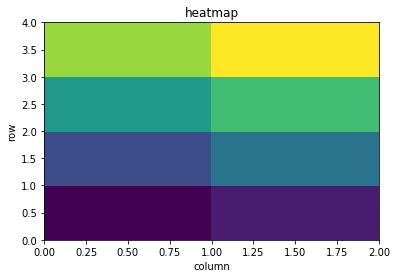

In [9]:
# ヒートマップのサンプルコード
plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(np.array([0, 1, 3, 5, 7, 9, 11, 13]).reshape(4, 2))
plt.show()

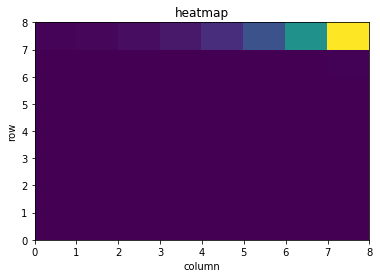

In [10]:
# 【問題4】小麦の数のヒートマップ

plt.xlabel("column")
plt.ylabel("row")
plt.title("heatmap")
plt.pcolor(board_ndarray_8_8)
plt.show()

## チェス盤の後半
アメリカの発明家レイ・カーツワイルはこの逸話を引用し、「チェス盤の後半」というフレーズを作った。技術の進歩ははじめの内は社会に対して目立った影響が感じられなくとも、倍に倍にと進んでいくと、チェス盤の後半にさしかかったころから、急激な変化を起こすということを伝えている。

### 【問題5】後半は前半の何倍か
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍かを求める。前半とは配列の0から3行目、後半は4から7行目である。

In [11]:
print("チェス盤の後半にある小麦の数は前半にある小麦の数の何倍か:{}倍"
      .format(board_ndarray_8_8[3:].sum()/board_ndarray_8_8[:3].sum()))

チェス盤の後半にある小麦の数は前半にある小麦の数の何倍か:1099511693311.004倍


#### 検証

In [12]:
print("2×3マスの板に小麦を並べる（ndarray）：{}".format(board_ndarray_2_3))
print("2×3マスのチェス盤の小麦の数の合計:{}".format(board_ndarray_8_8.sum()))
print("2×3マスの板に小麦を並べる（ndarray）：{}".format(board_ndarray_2_3.mean(axis=0)))
print("前半合計:{}".format(board_ndarray_2_3[:1].sum()))
print("後半合計:{}".format(board_ndarray_2_3[1:].sum()))
print("チェス盤の後半にある小麦の数は前半にある小麦の数の何倍か:{}倍"
      .format(board_ndarray_2_3[1:].sum()/board_ndarray_2_3[:1].sum()))

2×3マスの板に小麦を並べる（ndarray）：[[ 1  2  4]
 [ 8 16 32]]
2×3マスのチェス盤の小麦の数の合計:18446744073709551615
2×3マスの板に小麦を並べる（ndarray）：[ 4.5  9.  18. ]
前半合計:7
後半合計:56
チェス盤の後半にある小麦の数は前半にある小麦の数の何倍か:8.0倍


### 他の計算方法
はじめのサンプルコードではPythonのリストとfor文を使っていたが、他の方法も考えられる。
ndarrayのnp.append()とfor文を使うと次のように作ることができる。

In [13]:
# サンプルコード（np.append()）
n_squares = 4
small_board_ndarray = np.array([1])
for _ in range(n_squares - 1):
    small_board_ndarray = np.append(small_board_ndarray, 2*small_board_ndarray[-1])
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


ブロードキャストを活用することで、次のようにも作ることができる。

In [14]:
# サンプルコード（ブロードキャスト）
n_squares = 4
indices_of_squares = np.arange(n_squares)
small_board_ndarray = 2**indices_of_squares
print("4マスの板に小麦を並べる（ndarray）：{}".format(small_board_ndarray))

4マスの板に小麦を並べる（ndarray）：[1 2 4 8]


int64は64ビットの整数型で、-9,223,372,036,854,775,808 ~ 9,223,372,036,854,775,807 の範囲の整数値しか扱えない。  
今回は正の値しか利用しないため、 uint64 を使用することで解決する。 0 ~ 18,446,744,073,709,551,615 を扱うことができる。astypeメソッドを使うことで型を変換できるので、累乗の計算前にこれを使いndarrayをuint64型にしておく。

In [15]:
n_squares = 64
indices_of_squares = np.arange(n_squares).astype(np.uint64)
board_ndarray = 2**indices_of_squares
print("最後のマスの小麦の数：{}".format(board_ndarray[-1])) # 9223372036854775808

最後のマスの小麦の数：9223372036854775808


### 【問題6】他の計算方法によるn×mマスへの拡張
問題2と同様の「n×mマスのチェス盤の小麦の数を記したndarrayを返す関数」を、np.append()を使ったものと、ブロードキャストを使ったもので新たに作成する。  
それらの関数を使い8×8マスのチェス盤の小麦の数を再び求める。

In [16]:
#  【問題6】他の計算方法によるn×mマスへの拡張（np.append()）

def board_n_m_ap(n, m):
    """
    n×mマスのチェス盤の小麦の数を記したndarrayを返す関数。np.append()​を使用している。
    
    Parameteres
    --------------
    n: int
        チェス盤の行数
        
     m: int
         チェス盤の列数

    Returns
    --------------
    board_ndarray: ndarray
        n×mマスのチェス盤の小麦の数を記したndarray
    """
    n_squares = n*m
    small_board_ndarray = np.array([1]).astype(np.uint64)

    for _ in range(n_squares - 1):
        # ここでint型の2を掛けるとデータ型がfloat64型に変化してしまうため、ndarrayに変換、さらにuint64型に変換する
        small_board_ndarray = np.append(small_board_ndarray, np.array([2]).astype(np.uint64)*small_board_ndarray[-1])
    board_ndarray_n_m = small_board_ndarray.reshape(n, m)
    return board_ndarray_n_m

In [17]:
# 検証
print("データ型:{}".format(board_n_m_ap(2, 2).dtype))
print("2×2マスの板に小麦を並べる（ndarray）：{}".format(board_n_m_ap(2, 2)))
print("3×5マスの板に小麦を並べる（ndarray）：{}".format(board_n_m_ap(3, 5)))

データ型:uint64
2×2マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]
3×5マスの板に小麦を並べる（ndarray）：[[    1     2     4     8    16]
 [   32    64   128   256   512]
 [ 1024  2048  4096  8192 16384]]


データ型がfor文の中でfloat64に変わってしまう。  
関数が返す時にデータ型を変換するようにしたが、計算結果に影響がないか確認したい。

In [18]:
#  【問題6】他の計算方法によるn×mマスへの拡張（ブロードキャスト）

def board_n_m_br(n, m):
    """
    n×mマスのチェス盤の小麦の数を記したndarrayを返す関数。ブロードキャストを使用している。
    
    Parameteres
    --------------
    n: int
        チェス盤の行数
        
     m: int
         チェス盤の列数

    Returns
    --------------
    board_ndarray: ndarray
        n×mマスのチェス盤の小麦の数を記したndarray
    """
    n_squares = n*m
    indices_of_squares = np.arange(n_squares).astype(np.uint64)
    # 各マスには2**nの小麦が入る
    # nはnp.arange()で各マスに振ってある
    # よって、各マスに振ってある値を指数に２の累乗計算を行えば小麦の数が求まる
    small_board_ndarray = 2**indices_of_squares
    board_ndarray_n_m = small_board_ndarray.reshape(n, m)
    return board_ndarray_n_m

In [19]:
# 検証
print(board_n_m_br(2, 2).dtype)
print("2×2マスの板に小麦を並べる（ndarray）：{}".format(board_n_m_br(2, 2)))
print("3×5マスの板に小麦を並べる（ndarray）：{}".format(board_n_m_br(3, 5)))

uint64
2×2マスの板に小麦を並べる（ndarray）：[[1 2]
 [4 8]]
3×5マスの板に小麦を並べる（ndarray）：[[    1     2     4     8    16]
 [   32    64   128   256   512]
 [ 1024  2048  4096  8192 16384]]


#### 解答

In [20]:
print("（append）8×8マスのチェス盤の小麦の数の合計:{}".format(board_n_m_ap(8, 8).sum()))
print("（ブロードキャスト）8×8マスのチェス盤の小麦の数の合計:{}".format(board_n_m_br(8, 8).sum()))

（append）8×8マスのチェス盤の小麦の数の合計:18446744073709551615
（ブロードキャスト）8×8マスのチェス盤の小麦の数の合計:18446744073709551615


### 【問題7】計算時間の比較
3種類の方法を見てきました。それぞれの計算時間をJupyter Notebookの%%timeitを用いて計測し、比較と考察を行ってください。  
%%timeitはセル内のコードを複数回実行し、その平均実行時間を出力する働きをします。  

##### 計算時間:Pythonのリストとfor文

In [ ]:
%%timeit
board_n_m(8, 8)

#### 計算時間:appendとfor文

In [ ]:
%%timeit
board_n_m_ap(8, 8)

#### 計算時間:ブロードキャスト

In [ ]:
%%timeit
board_n_m_br(8, 8)

#### 比較と考察
私が計算時間を確認した時は、以下のようであった。  
Pythonのリストとfor文:100000 loops, best of 5: 11.5 µs per loop  
appendとfor文:1000 loops, best of 5: 324 µs per loop  
ブロードキャスト:100000 loops, best of 5: 2.51 µs per loop  

ブロードキャストを用いた関数は、Pythonのリストとfor文を用いた関数の4倍程速い。  
Pythonのリストとfor文を用いた関数は、appendとfor文を用いた関数の30倍程速い。  
ブロードキャストを用いた関数は速く処理できるようである。  
appendとfor文を用いた関数は圧倒的に遅いので、出来るだけ避ける。  

## 課題提出後フィードバック

・棒グラフに関して、横軸目盛りがずれていた。以下のコードで修正した。
>plt.xticks(np.arange(0, 4, 1))  
plt.bar(np.arange(1,4), np.array([1, 2, 3]))  

・ 【問題7】計算時間の比較の考察に関して、分類問題の予測ラベルなどで使用する連番を作成するときなどはブロードキャストを用いる方が無難である。